In [1]:
from SIR_control import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [3]:
tt = np.linspace(0,T,N+1)
tt

array([0.0000e+00, 2.0000e-03, 4.0000e-03, ..., 9.9996e+01, 9.9998e+01,
       1.0000e+02])

In [10]:
from SIR_control import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

T = 100
mybeta = 0.3
mygamma = 0.1
sigma0 = mybeta/mygamma
qmax = 1.0
print((1-qmax)*sigma0)
N = 50000
myrho=1.1
myymax=0.1
myx0=0.9
myy0=0.1


# Use parameter continuation to get a good initial guess
x, y, sigma, t, newguess = solve_pmp_rho(y0=myy0, beta= mybeta, gamma = mygamma,T=100,qmax=qmax, ymax=myymax, c1=0, c2=1, c3=1, N=N,guess=None, rho=myrho)
x, y, sigma, t, newguess = solve_pmp_rho(y0=myy0, beta= mybeta, gamma = mygamma,T=100,qmax=qmax, ymax=myymax, c1=0, c2=0.1, c3=1, N=N,guess=None, rho=myrho)
x, y, sigma, t, newguess = solve_pmp_rho(y0=myy0, beta= mybeta, gamma = mygamma,T=100,qmax=qmax, ymax=myymax, c1=0, c2=0.01, c3=1, N=N,guess=None, rho=myrho)
x, y, sigma, t, newguess = solve_pmp_rho(y0=myy0, beta= mybeta, gamma = mygamma,T=100,qmax=qmax, ymax=myymax, c1=0, c2=0.001, c3=1, N=N,guess=None, rho=myrho)

"""
x, y, sigma, t, newguess = solve_pmp_rho(T=100,qmax=qmax,c2=5e-3,N=N,guess=newguess, rho=myrho)
x, y, sigma, t, newguess = solve_pmp_rho(T=100,qmax=qmax,c2=2e-3,N=N,guess=newguess, rho=myrho)
x, y, sigma, t, newguess = solve_pmp_rho(T=100,qmax=qmax,c2=1e-3,N=N,guess=newguess, rho=myrho)
x, y, sigma, t, newguess = solve_pmp_rho(T=100,qmax=qmax,c2=5e-4,N=N,guess=newguess, rho=myrho)
x, y, sigma, t, newguess = solve_pmp_rho(T=100,qmax=qmax,c2=1e-4,N=N,guess=newguess, rho=myrho)
x, y, sigma, t, newguess = solve_pmp_rho(T=100,qmax=qmax,c2=1e-5,N=N,guess=newguess, rho=myrho)
x, y, sigma, t, newguess = solve_pmp_rho(T=100,qmax=qmax,c2=1e-6,N=N,guess=newguess, rho=myrho)
x, y, sigma, t, newguess = solve_pmp_rho(T=100,qmax=qmax,c2=1e-7,N=N,guess=newguess, rho=myrho)
x, y, sigma, t, newguess = solve_pmp_rho(T=100,qmax=qmax,c2=1e-8,N=N,guess=newguess, rho=myrho)
"""

fig=plot_timeline(x,y,sigma/sigma0,t)

0.0


C:\Users\UJ\Documents\GitHub\SIR_control\one_pop\code\SIR_control.py:109: RuntimeWarning: invalid value encountered in power
  sigma = sigma0 - ((u[3,:]-u[2,:])*gamma*u[1,:]*u[0,:]/(rho*c2))**(1/(rho-1))


result.status: A singular Jacobian encountered when solving the collocation system.


Exception: solve_bvp did not converge

In [10]:
sigma

array([5.99999937, 5.99999937, 5.99999937, ..., 5.99999877, 5.99999877,
       5.99999877])

# Figure 1

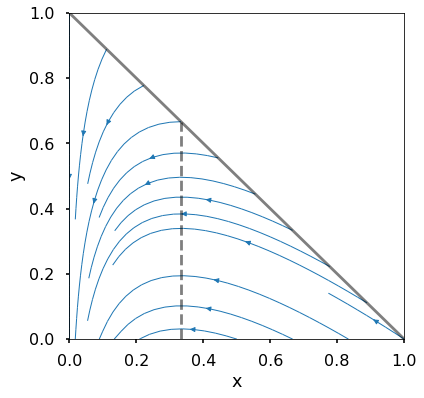

In [22]:
fig=plot_phaseplane(beta=0.3,gamma=0.1)

In [ ]:
fig=plot_phaseplane(beta=0.15,gamma=0.1)
plt.savefig('../figures/sigma15.pdf')

# Figure 2

In [3]:
x0=0.99
y0 = 0.01

def xinf_sigma(sigma):
    return x_inf(x0, y0, sigma)

from scipy.optimize import fsolve

sigma0 = 3.
myfun = lambda sigma: xinf_sigma(sigma) - 1/sigma0
sigmastar = fsolve(myfun,sigma0)[0]
qfun = lambda t, u: 1-sigmastar/sigma0
1-sigmastar/sigma0

0.4557190235926959

In [4]:
x1, y1, t1 = SIR_forward(qfun=qfun,T=1000)

In [5]:
def qfun(t,u):
    if u[0]>1./sigma0: return 0
    else: return 1
    
x2, y2, t2 = SIR_forward(qfun=qfun,T=1000)

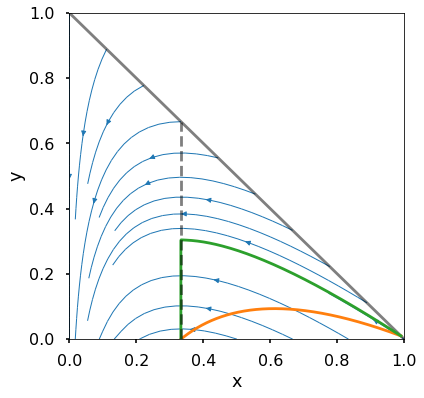

In [6]:
fig=plot_phaseplane([x1,x2],[y1,y2])

# Figure 3

In [7]:
x0 = 0.7; y0 = 0.2
switch_times=np.array([0,25])

def qfun(t,u):
    if np.argmax(t<switch_times) % 2 == 0: qval = 0
    else: qval = 1
    return qval
        
x1, y1, t1 = SIR_forward(qfun=qfun, x0=x0,y0=y0,T=54)

In [8]:
switch_times=np.array([8,16.5])

def qfun(t,u):
    if np.argmax(t<switch_times) % 2 == 0: qval = 0
    else: qval = 1
    return qval

x2, y2, t2 = SIR_forward(qfun=qfun,x0=x0,y0=y0,T=16.5)

In [9]:
switch_times=np.array([2,4,6,8,10,12,14,16,18,20,21.6])

def qfun(t,u):
    if np.argmax(t<switch_times) % 2 == 0: qval = 0
    else: qval = 1
    return qval

x3, y3, t3 = SIR_forward(qfun=qfun,x0=x0,y0=y0,T=21.6)

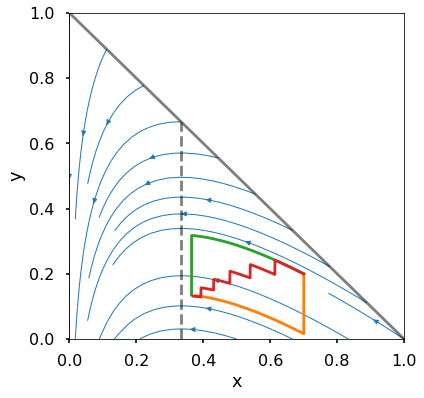

In [10]:
fig=plot_phaseplane([x1,x2,x3],[y1,y2,y3])

# Figure 4

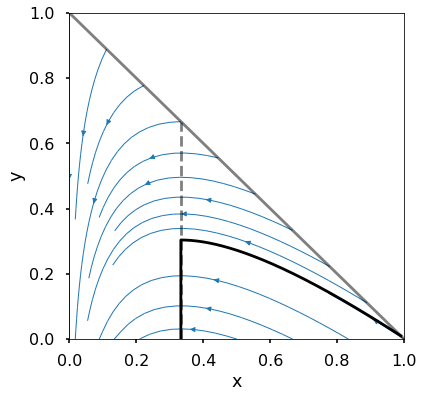

In [13]:
T = 100
beta = 0.3
gamma = 0.1
sigma0 = beta/gamma

def qfun(t,u):
    x = u[0]
    if t == T: return 0
    elif x<1./(sigma0*(1-np.exp(-gamma*(T-t)))): return 1
    else: return 0
    
x, y, t = SIR_forward(qfun=qfun,x0=0.99,y0=0.01,beta=beta,gamma=gamma)
fig=plot_phaseplane([x],[y],color='k')

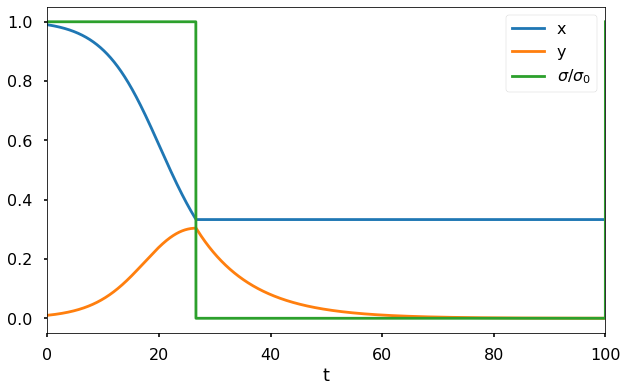

In [14]:
q = np.array([qfun(tt,[xx,0]) for tt, xx in zip(t,x)])
control = 1-q
fig = plot_timeline(x,y,control,t)

# Figure 5

In [7]:
T = 70
beta = 0.3
gamma = 0.1
sigma0 = beta/gamma

def qfun(t,u):
    x = u[0]
    if t == T: return 0
    elif x<1./(sigma0*(1-np.exp(-gamma*(T-t)))): return 1
    else: return 0
    
x1, y1, t1 = SIR_forward(qfun=qfun,x0=0.99,y0=0.01,beta=beta,gamma=gamma,T=T)

In [16]:
T = 40

def qfun(t,u):
    x = u[0]
    if t == T: return 0
    elif x<1./(sigma0*(1-np.exp(-gamma*(T-t)))): return 1
    else: return 0
    
x2, y2, t2 = SIR_forward(qfun=qfun,x0=0.99,y0=0.01,beta=beta,gamma=gamma,T=T)

In [17]:
T = 30

def qfun(t,u):
    x = u[0]
    if t == T: return 0
    elif x<1./(sigma0*(1-np.exp(-gamma*(T-t)))): return 1
    else: return 0
    
x3, y3, t3 = SIR_forward(qfun=qfun,x0=0.99,y0=0.01,beta=beta,gamma=gamma,T=T)

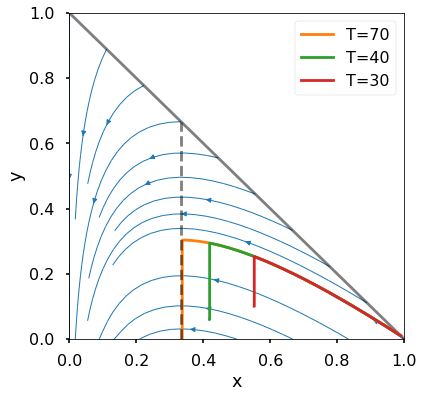

In [18]:
fig = plot_phaseplane([x1,x2,x3],[y1,y2,y3],labels=['T=70','T=40','T=30'])
plt.legend()

# Figure 6

## via PMP (necessary conditions)

In [16]:
qmax = 0.6
N = 50000

# Use parameter continuation to get a good initial guess
"""
x, y, sigma, t, newguess = solve_pmp(T=100,qmax=qmax,c2=0.25,N=N,guess=None)
x, y, sigma, t, newguess = solve_pmp(T=100,qmax=qmax,c2=0.1,N=N,guess=newguess)
x, y, sigma, t, newguess = solve_pmp(T=100,qmax=qmax,c2=0.01,N=N,guess=newguess)
x, y, sigma, t, newguess = solve_pmp(T=100,qmax=qmax,c2=5e-3,N=N,guess=newguess)
x, y, sigma, t, newguess = solve_pmp(T=100,qmax=qmax,c2=2e-3,N=N,guess=newguess)
x, y, sigma, t, newguess = solve_pmp(T=100,qmax=qmax,c2=1e-3,N=N,guess=newguess)
x, y, sigma, t, newguess = solve_pmp(T=100,qmax=qmax,c2=5e-4,N=N,guess=newguess)
x, y, sigma, t, newguess = solve_pmp(T=100,qmax=qmax,c2=1e-4,N=N,guess=newguess)
x, y, sigma, t, newguess = solve_pmp(T=100,qmax=qmax,c2=1e-5,N=N,guess=newguess)
x, y, sigma, t, newguess = solve_pmp(T=100,qmax=qmax,c2=1e-6,N=N,guess=newguess)
x, y, sigma, t, newguess = solve_pmp(T=100,qmax=qmax,c2=1e-7,N=N,guess=newguess)
"""
x, y, sigma, t, newguess = solve_pmp(T=100,qmax=qmax,c2=1e-8,N=N,guess=newguess)

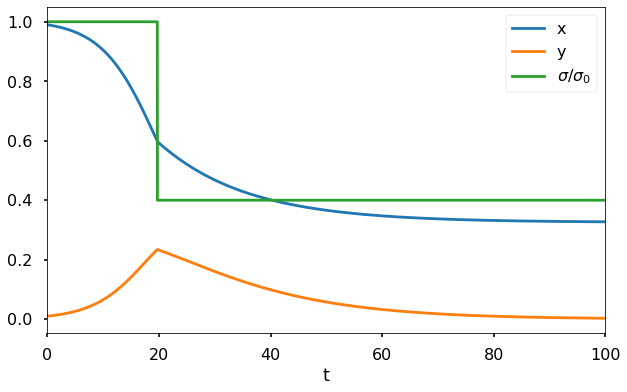

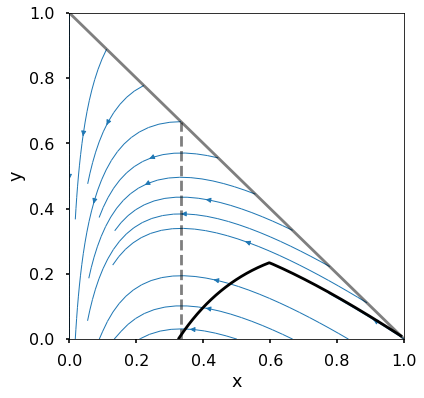

In [17]:
fig=plot_timeline(x,y,sigma/sigma0,t)
fig=plot_phaseplane([x],[y],color='k')

In [5]:
t

array([0.0000e+00, 2.0000e-03, 4.0000e-03, ..., 9.9996e+01, 9.9998e+01,
       1.0000e+02])

## via HJB (necessary + sufficient conditions)

# Figure 7

## Via PMP

In [ ]:
x0 = 0.9
y0 = 0.1
beta = 0.3
gamma = 0.1
sigma0 = beta/gamma
c2s = [1e-2,1e-3,1e-5]
x1, y1, sigma1, t1, newguess = solve_pmp(c2=1,T=100,guess=None,x0=x0,y0=y0)
x1, y1, sigma1, t1, newguess = solve_pmp(c2=c2s[0],T=100,guess=newguess,x0=x0,y0=y0)
x2, y2, sigma2, t2, newguess = solve_pmp(c2=c2s[1],T=100,guess=newguess,x0=x0,y0=y0)
x3, y3, sigma3, t3, newguess = solve_pmp(c2=c2s[2],T=100,guess=newguess,x0=x0,y0=y0)

In [ ]:
labels = ['$c_2='+str(val)+'$' for val in c2s]
fig=plot_timelines([x1,x2,x3],[y1,y2,y3],[sigma1/sigma0,sigma2/sigma0,sigma3/sigma0],[t1,t2,t3],labels=labels)
plt.savefig('../figures/varying_c2.pdf')

In [ ]:
fig=plot_phaseplane([x1,x2,x3],[y1,y2,y3])
plt.savefig('../figures/varying_c2_xy.pdf')

## Via HJB

# Figure 8

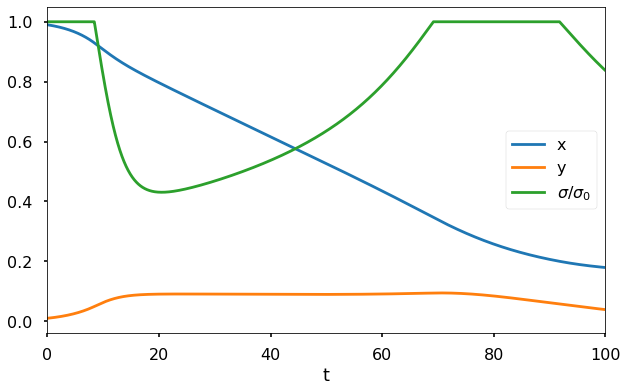

In [3]:
x0 = 0.99
y0 = 0.01
x, y, sigma, t, newguess = solve_pmp(c2=1e-3,c3=10,ymax=0.1,T=100,guess=None,x0=x0,y0=y0)
fig=plot_timeline(x,y,sigma/sigma0,t)
#plt.savefig('../figures/min_hosp_1_t.pdf')

In [ ]:
fig = plot_phaseplane([x],[y],color='k')
plt.savefig('../figures/min_hosp_1_xy.pdf')

# Figure 9

In [ ]:
x0 = 0.99
y0 = 0.01
x, y, sigma, t, newguess = solve_pmp(c2=1e-3,c3=10,ymax=0.1,T=100,guess=None,x0=x0,y0=y0)
x, y, sigma, t, newguess = solve_pmp(c2=1e-3,c3=1,ymax=0.1,T=100,guess=newguess,x0=x0,y0=y0)
fig=plot_timeline(x,y,sigma/sigma0,t)
plt.savefig('../figures/min_hosp_2_t.pdf')

In [ ]:
fig = plot_phaseplane([x],[y],color='k')
plt.savefig('../figures/min_hosp_2_xy.pdf')

# Figure 10

In [ ]:
N = 1
alpha = 0.006  # IFR
eta = 2*alpha # Increase in IFR when no medical care is given
d = 1e4 # Days left of life for average victim
eps = 0.2  # Fraction of value of a day of life that is lost due to intervention
c1 = N*alpha
c2 = N*eps/d
c3 = eta*N
gamma = 1./10
sigma0 = 2.5
beta = sigma0*gamma
ymax=0.02
y0 = 1e-3
x0 = 1-y0
T = 200
x, y, sigma, t, newguess = solve_pmp(beta=beta,gamma=gamma,c1=c1,c2=4*c2,c3=c3,ymax=ymax,T=T,guess=None,x0=x0,y0=y0,N=10000)
x, y, sigma, t, newguess = solve_pmp(beta=beta,gamma=gamma,c1=c1,c2=2*c2,c3=c3,ymax=ymax,T=T,guess=None,x0=x0,y0=y0,N=10000)
x, y, sigma, t, newguess = solve_pmp(beta=beta,gamma=gamma,c1=c1,c2=c2,c3=c3,ymax=ymax,T=T,guess=newguess,x0=x0,y0=y0,N=10000)

fig=plot_timeline(x,y,sigma/sigma0,t)
plt.savefig('../figures/real_world_1_t.pdf')

In [ ]:
fig = plot_phaseplane([x],[y],beta=beta,gamma=gamma,color='k')
plt.savefig('../figures/real_world_1_xy.pdf')

In [ ]:
print(c1,c2,c3)

# Figure 11

In [ ]:
N = 1
alpha = 0.012  # IFR
eta = 2*alpha # Increase in IFR when no medical care is given
d = 1e4 # Days left of life for average victim
eps = 0.05  # Fraction of value of a day of life that is lost due to intervention
c1 = N*alpha
c2 = N*eps/d
c3 = eta*N
gamma = 1./10
sigma0 = 2.5
beta = sigma0*gamma
ymax=0.02
y0 = 1e-3
x0 = 1-y0
T = 200
x, y, sigma, t, newguess = solve_pmp(beta=beta,gamma=gamma,c1=c1,c2=20*c2,c3=c3,ymax=ymax,T=T,guess=None,x0=x0,y0=y0,N=10000)
x, y, sigma, t, newguess = solve_pmp(beta=beta,gamma=gamma,c1=c1,c2=6*c2,c3=c3,ymax=ymax,T=T,guess=newguess,x0=x0,y0=y0,N=10000)
x, y, sigma, t, newguess = solve_pmp(beta=beta,gamma=gamma,c1=c1,c2=4*c2,c3=c3,ymax=ymax,T=T,guess=newguess,x0=x0,y0=y0,N=10000)
x, y, sigma, t, newguess = solve_pmp(beta=beta,gamma=gamma,c1=c1,c2=2*c2,c3=c3,ymax=ymax,T=T,guess=newguess,x0=x0,y0=y0,N=10000)
x, y, sigma, t, newguess = solve_pmp(beta=beta,gamma=gamma,c1=c1,c2=c2,c3=c3,ymax=ymax,T=T,guess=newguess,x0=x0,y0=y0,N=10000)

fig=plot_timeline(x,y,sigma/sigma0,t)
plt.savefig('../figures/real_world_2_t.pdf')

In [ ]:
fig = plot_phaseplane([x],[y],beta=beta,gamma=gamma,color='k')
plt.savefig('../figures/real_world_2_xy.pdf')

In [ ]:
print(c1,c2,c3)

# Figure 12

In [ ]:
N = 1
alpha = 0.006  # IFR
eta = 2*alpha # Increase in IFR when no medical care is given
d = 1e4 # Days left of life for average victim
eps = 0.5  # Fraction of value of a day of life that is lost due to intervention
c1 = N*alpha
c2 = N*eps/d
c3 = eta*N
gamma = 1./10
sigma0 = 2.5
beta = sigma0*gamma
ymax=0.02
y0 = 1e-3
x0 = 1-y0
T = 200
x, y, sigma, t, newguess = solve_pmp(beta=beta,gamma=gamma,c1=c1,c2=4*c2,c3=c3,ymax=ymax,T=T,guess=None,x0=x0,y0=y0,N=10000)
x, y, sigma, t, newguess = solve_pmp(beta=beta,gamma=gamma,c1=c1,c2=2*c2,c3=c3,ymax=ymax,T=T,guess=None,x0=x0,y0=y0,N=10000)
x, y, sigma, t, newguess = solve_pmp(beta=beta,gamma=gamma,c1=c1,c2=c2,c3=c3,ymax=ymax,T=T,guess=newguess,x0=x0,y0=y0,N=10000)

fig=plot_timeline(x,y,sigma/sigma0,t)
plt.savefig('../figures/real_world_3_t.pdf')

In [ ]:
fig = plot_phaseplane([x],[y],beta=beta,gamma=gamma,color='k')
plt.savefig('../figures/real_world_3_xy.pdf')